Part 1 - Classic vs. Deep Learning semantic segmentation

In [290]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy
%matplotlib inline

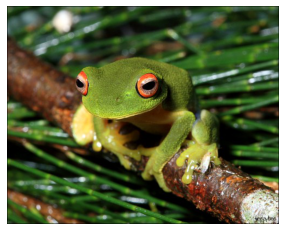

In [291]:
frog1 = cv2.imread('data/frogs/frog1.jpg')
plt.imshow(cv2.cvtColor(frog1, cv2.COLOR_BGR2RGB))
_ = plt.axis('off')

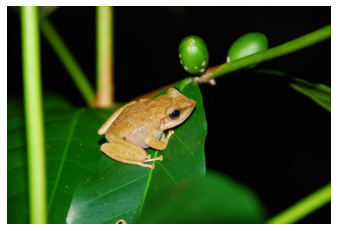

In [292]:
frog2 = cv2.imread('data/frogs/frog2.jpg')
plt.imshow(cv2.cvtColor(frog2, cv2.COLOR_BGR2RGB))
_ = plt.axis('off')

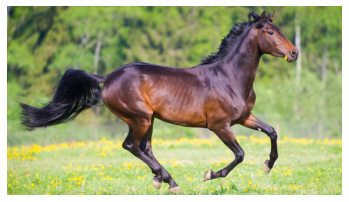

In [293]:
horse1 = cv2.imread('data/horses/horse1.png')
plt.imshow(cv2.cvtColor(horse1, cv2.COLOR_BGR2RGB))
_ = plt.axis('off')

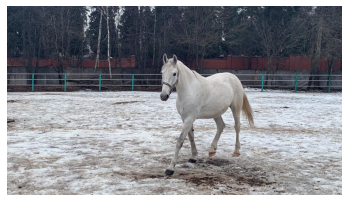

In [294]:
horse2 = cv2.imread('data/horses/horse2.jpg')
plt.imshow(cv2.cvtColor(horse2, cv2.COLOR_BGR2RGB))
_ = plt.axis('off')

In [333]:
def getSegmentation(im, threshold=100, laplacian_ksize=5):
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

    # gray = cv2.GaussianBlur(gray, (5,5), 1)

    laplacian = cv2.Laplacian(gray, cv2.CV_32F, ksize=laplacian_ksize)
    laplacian = (laplacian / laplacian.max()) * 255
    laplacian = np.int8(laplacian)

    laplacian[laplacian < threshold] = 0
    laplacian[laplacian >= threshold] = 1

    closing = cv2.morphologyEx(laplacian, cv2.MORPH_CLOSE, kernel=np.ones([15,15]))

    _, markers = cv2.connectedComponents(laplacian)
    markers = np.int32(markers)

    markers = cv2.watershed(im, markers)

    return markers

In [334]:
markers = getSegmentation(frog2, 50, 9)
plt.imshow(markers)

error: OpenCV(4.5.1) D:/bld/libopencv_1617299095428/work/modules/imgproc/src/morph.simd.hpp:756: error: (-213:The function/feature is not implemented) Unsupported data type (=1) in function 'cv::opt_AVX2::getMorphologyRowFilter'
